<a href="https://colab.research.google.com/github/Abhicodeitout/Abhicodeitout/blob/main/F_T_result_for_codet5p_220m_70_15_15_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;New&#41; Try the Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  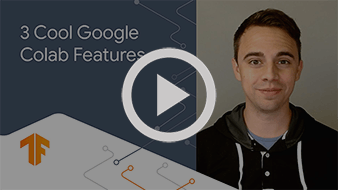
  </a>
</center>

In [3]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.0 MB/s eta 0:00:00


In [4]:
# Step 1: Install libraries
!pip install datasets huggingface_hub

# Step 2: Import the libraries
from datasets import load_dataset

# Step 3: Load the dataset
dataset = load_dataset('erishabh/unit-test-v1')

# Step 4: Access the data
print(dataset['train'][0])


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/442 [00:00<?, ?B/s]

(…)-00000-of-00001-b1c92c300f3b070d.parquet:   0%|          | 0.00/9.43M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2470 [00:00<?, ? examples/s]

{'prompt': 'Create unit tests for all functions written in the following file: """Generates the sdk files from the trailmaps."""\nimport os\nimport re\nimport subprocess  # nosec: B404\nimport sys\nfrom pathlib import Path\nfrom typing import Any, Dict, List, Optional, TextIO\n\nfrom openbb_terminal.core.sdk.sdk_helpers import get_sdk_imports_text\nfrom openbb_terminal.core.sdk.trailmap import Trailmap, get_trailmaps\nfrom openbb_terminal.core.session.current_system import set_system_variable\nfrom openbb_terminal.rich_config import console\n\nset_system_variable("TEST_MODE", True)\nset_system_variable("LOG_COLLECT", False)\nREPO_ROOT = Path(__file__).parent.joinpath("openbb_terminal").resolve()\n\nsub_names = {\n    "defi": "DeFi",\n    "disc": "Discovery",\n    "dd": "Due Diligence",\n    "onchain": "OnChain",\n    "ov": "Overview",\n    "keys": "Keys",\n    "forecast": "Forecasting",\n    "alt": "Alternative",\n    "crypto": "Cryptocurrency",\n    "ba": "Behavioral Analysis",\n    "

In [5]:
print(dataset['train'].features)

{'prompt': Value(dtype='string', id=None), 'completion': Value(dtype='string', id=None), '__index_level_0__': Value(dtype='int64', id=None)}


In [6]:
import pandas as pd
from datasets import load_dataset, Dataset

# Load the dataset
dataset = load_dataset('erishabh/unit-test-v1')

# Convert the 'train' split to a pandas DataFrame
df = dataset['train'].to_pandas()

# Drop duplicates based on 'prompt' and 'completion' columns
dataset_cleaned = df.drop_duplicates(subset=['prompt', 'completion'])

# Convert the cleaned DataFrame back to a Hugging Face Dataset
dataset_cleaned = Dataset.from_pandas(dataset_cleaned)  # Use Dataset.from_pandas

# Check the number of rows before and after
print(f"Original dataset size: {len(dataset['train'])}")
print(f"Cleaned dataset size: {len(dataset_cleaned)}")

# Update the 'train' split of the original dataset
dataset['train'] = dataset_cleaned

# Display the cleaned dataset (e.g., print the first few rows)
print(dataset['train'][:5])

Original dataset size: 2470
Cleaned dataset size: 2470
{'prompt': ['Create unit tests for all functions written in the following file: """Generates the sdk files from the trailmaps."""\nimport os\nimport re\nimport subprocess  # nosec: B404\nimport sys\nfrom pathlib import Path\nfrom typing import Any, Dict, List, Optional, TextIO\n\nfrom openbb_terminal.core.sdk.sdk_helpers import get_sdk_imports_text\nfrom openbb_terminal.core.sdk.trailmap import Trailmap, get_trailmaps\nfrom openbb_terminal.core.session.current_system import set_system_variable\nfrom openbb_terminal.rich_config import console\n\nset_system_variable("TEST_MODE", True)\nset_system_variable("LOG_COLLECT", False)\nREPO_ROOT = Path(__file__).parent.joinpath("openbb_terminal").resolve()\n\nsub_names = {\n    "defi": "DeFi",\n    "disc": "Discovery",\n    "dd": "Due Diligence",\n    "onchain": "OnChain",\n    "ov": "Overview",\n    "keys": "Keys",\n    "forecast": "Forecasting",\n    "alt": "Alternative",\n    "crypto": "C

In [7]:
split_A1_A2 = dataset['train'].train_test_split(test_size=0.5, shuffle=True)

# Step 5: Further split A1 into A3 and A4
split_A3_A4 = split_A1_A2['train'].train_test_split(test_size=0.5, shuffle=True)

# Step 6: Create training and testing datasets from A3
train_dataset = split_A3_A4['train'].train_test_split(test_size=0.3, shuffle=True)

# Step 7: Final datasets
final_train_dataset = train_dataset['train']  # 60% of A3 (40% of original)
final_test_dataset = train_dataset['test']     # 40% of A3 (20% of original)

# Optional: Check the sizes of the datasets
print(f"Final Training dataset size: {len(final_train_dataset)}")
print(f"Final Testing dataset size: {len(final_test_dataset)}")

# Step 8: Split final_test_dataset into 20% for validation and 80% for testing
if len(final_test_dataset) > 5:  # Ensure enough samples for 20% validation
    final_test_dataset = final_test_dataset.shuffle(seed=42)  # Shuffle for randomness
    val_size = int(len(final_test_dataset) * 0.5)  # 20% for validation
    test_size = len(final_test_dataset) - val_size  # Remaining samples for testing

    validation_dataset = final_test_dataset.select(range(val_size))  # First 20% for validation
    final_test_dataset = final_test_dataset.select(range(val_size, len(final_test_dataset)))  # Remaining 80% for testing

# Optional: Check sizes of the new datasets
print(f"Validation dataset size: {len(validation_dataset)}")
print(f"Final Test dataset size: {len(final_test_dataset)}")

# Optional: Display samples from the datasets
print("Sample from final training dataset:", final_train_dataset[0])
print("Sample from final test dataset:", final_test_dataset[0])
print("Sample from validation dataset:", validation_dataset[0])

Final Training dataset size: 431
Final Testing dataset size: 186
Validation dataset size: 93
Final Test dataset size: 93
Sample from final training dataset: {'prompt': 'Create unit tests for all functions written in the following file: import os\nimport textwrap\nfrom enum import auto, Enum\nfrom traceback import extract_stack, format_exc, format_list, StackSummary\nfrom typing import cast, NoReturn, Optional\n\nimport torch._guards\n\nfrom . import config\nfrom .config import is_fbcode\n\nfrom .utils import counters\n\nif is_fbcode():\n    from torch.fb.exportdb.logging import exportdb_error_message\nelse:\n\n    def exportdb_error_message(case_name):\n        return (\n            "For more information about this error, see: "\n            + "https://pytorch.org/docs/main/generated/exportdb/index.html#"\n            + case_name.replace("_", "-")\n        )\n\n\nimport logging\n\nlog = logging.getLogger(__name__)\ngraph_breaks_log = torch._logging.getArtifactLogger(__name__, "graph_br

In [8]:
# prompt: save the final training and testing datse i want save in praqlet form

# Save the datasets in parquet format
final_train_dataset.to_parquet("final_train_dataset.parquet")
final_test_dataset.to_parquet("final_test_dataset.parquet")
validation_dataset.to_parquet("final_validate_dataset.parquet")

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

2044198

Below is the example of 60:20:20 were 60 for train data and 20 for test and 20 for validation

In [20]:
# Install required libraries
# Install required libraries
!pip install transformers datasets torch pyarrow

import torch
import pandas as pd
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Trainer, TrainingArguments

# Step 1: Load datasets from Parquet files
train_df = pd.read_parquet('final_train_dataset.parquet')
test_df = pd.read_parquet('final_test_dataset.parquet')
validate_df = pd.read_parquet('final_validate_dataset.parquet')  # Load validation dataset

# Convert Pandas DataFrame to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)
validate_dataset = Dataset.from_pandas(validate_df)  # Convert to Dataset

# Step 2: Load the tokenizer and model using Auto classes
tokenizer = AutoTokenizer.from_pretrained('Salesforce/codet5p-220m')
model = AutoModelForSeq2SeqLM.from_pretrained('Salesforce/codet5p-220m')

# Check if CUDA is available and move the model to GPU if possible
if torch.cuda.is_available():
    device = torch.device('cuda')
    model.to(device)  # Move the model to the GPU
else:
    device = torch.device('cpu')

# Step 3: Tokenize the dataset
def tokenize_function(examples):
    model_inputs = tokenizer(examples['prompt'], max_length=512, padding='max_length', truncation=True)

    # Set labels for training using 'completion'
    if 'completion' in examples:
        model_inputs['labels'] = tokenizer(examples['completion'], max_length=512, padding='max_length', truncation=True)['input_ids']

    return model_inputs

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)
tokenized_validate_dataset = validate_dataset.map(tokenize_function, batched=True)  # Tokenize validation dataset

# Set format for PyTorch
tokenized_train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
tokenized_test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
tokenized_validate_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])  # Format validation dataset

# Step 4: Set up training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to=['none'],  # Disable WandB
    logging_dir='./logs',
    logging_steps=10,
)

# Step 5: Create Trainer and fine-tune the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_validate_dataset,  # Use validation dataset for evaluation
)

# Train the model
trainer.train()

# Step 6: Evaluate the model on the validation dataset
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

# Step 7: Generate output for the test dataset
def generate_outputs(dataset):
    model.eval()  # Set model to evaluation mode
    predictions = []

    for example in dataset:
        # Use 'input_ids' and 'attention_mask' from the tokenized dataset
        inputs = {
            'input_ids': example['input_ids'].unsqueeze(0).to(device),  # Add batch dimension and move to device
            'attention_mask': example['attention_mask'].unsqueeze(0).to(device)  # Add batch dimension and move to device
        }

        with torch.no_grad():
            outputs = model.generate(**inputs)

        # Decode and store the prediction
        prediction = tokenizer.decode(outputs[0], skip_special_tokens=True)
        predictions.append(prediction)

    return predictions

# Get predictions for the test dataset
test_predictions = generate_outputs(tokenized_test_dataset)

# Optional: Display results
for i, prediction in enumerate(test_predictions):
    print(f"Test Example {i + 1}: {prediction}")


Map:   0%|          | 0/431 [00:00<?, ? examples/s]

Map:   0%|          | 0/93 [00:00<?, ? examples/s]

Map:   0%|          | 0/93 [00:00<?, ? examples/s]

KeyboardInterrupt: 

In [27]:
!pip install transformers datasets torch pyarrow

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch
import os

# Path to your fine-tuned model checkpoint
checkpoint = "/content/new_results/checkpoint-324"
device = "cuda" if torch.cuda.is_available() else "cpu"  # Use GPU if available

# Load the tokenizer from the original model (if it was not saved with your model)
tokenizer = AutoTokenizer.from_pretrained('Salesforce/codet5p-220m')

# Load the model from the checkpoint directory
model = AutoModelForSeq2SeqLM.from_pretrained(
    checkpoint,
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32,  # Use appropriate dtype
    low_cpu_mem_usage=True,
    trust_remote_code=True
).to(device)

# Save the tokenizer to your checkpoint directory (optional but highly recommended)
tokenizer.save_pretrained(checkpoint)

# Example input for inference
input_text = "Create unit tests for all functions written in the following file: from typing import Any, Callable\n\nimport torch\nimport torch.utils._pytree as pytree\nfrom torch._ops import HigherOrderOperator\n\n\ndef autograd_not_implemented_inner(\n    operator: HigherOrderOperator, delayed_error: bool, *args: Any, **kwargs: Any\n) -> Any:\n    \"\"\"If autograd is enabled and any of the arguments require grad this will either\n    raise an error or return a DelayedError depending on the value of delayed.\n\n    Args:\n        operator: The HigherOrderOperator to call with the *args and **kwargs with\n        op_name: The name of the HigherOrderOperator\n        delayed_error: If True, return a DelayedError instead of raising an error\n        args: The flattened operands to the HigherOrderOperator\n        kwargs: The keyword arguments to the HigherOrderOperator\n\n    Raises:\n        RuntimeError: If autograd is enabled and any of the arguments to the HigherOrderOperator\n    \"\"\"\n    with torch._C._AutoDispatchBelowAutograd():\n        result = operator(*args, **kwargs)\n        flat_operands = pytree.arg_tree_leaves(*args)\n        if torch.is_grad_enabled() and any(\n            f.requires_grad for f in flat_operands if isinstance(f, torch.Tensor)\n        ):\n            if delayed_error:\n                err_fn = torch._C._functions.DelayedError(\n                    f\"Autograd not implemented for {str(operator)}\",\n                    1,\n                )\n\n                def fake_requires_grad(tensor):\n                    if torch.is_floating_point(tensor) or torch.is_complex(tensor):\n                        tensor = tensor.detach()\n                        tensor.requires_grad = True\n                    return tensor\n\n                return pytree.tree_map_only(\n                    torch.Tensor, lambda x: err_fn(fake_requires_grad(x)), result\n                )\n            else:\n                raise RuntimeError(f\"Autograd not implemented for {str(operator)}\")\n        return result\n\n\ndef autograd_not_implemented(op: HigherOrderOperator, deferred_error: bool) -> Callable:\n    def inner(*args, **kwargs):\n        return autograd_not_implemented_inner(op, deferred_error, *args, **kwargs)\n\n    return inner\n"

# Encode the input text
encoding = tokenizer(input_text, return_tensors="pt").to(device)
encoding['decoder_input_ids'] = encoding['input_ids'].clone()  # Set decoder input IDs for generation

# Generate output
with torch.no_grad():  # Disable gradient calculation during inference
    outputs = model.generate(**encoding, max_length=1000)

# Decode the generated output
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Print the generated text
print(generated_text)

Token indices sequence length is longer than the specified maximum sequence length for this model (554 > 512). Running this sequence through the model will result in indexing errors


Create unit tests for all functions written in the following file: from typing import Any, Callable

import torch
import torch.utils._pytree as pytree
from torch._ops import HigherOrderOperator


def autograd_not_implemented_inner(
    operator: HigherOrderOperator, delayed_error: bool, *args: Any, **kwargs: Any
) -> Any:
    """If autograd is enabled and any of the arguments require grad this will either
    raise an error or return a DelayedError depending on the value of delayed.

    Args:
        operator: The HigherOrderOperator to call with the *args and **kwargs with
        op_name: The name of the HigherOrderOperator
        delayed_error: If True, return a DelayedError instead of raising an error
        args: The flattened operands to the HigherOrderOperator
        kwargs: The keyword arguments to the HigherOrderOperator

    Raises:
        RuntimeError: If autograd is enabled and any of the arguments to the HigherOrderOperator
    """
    with torch._C._AutoDispatchBelow

In [10]:
# Install required libraries
!pip install transformers datasets torch pyarrow

import torch
import pandas as pd
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Trainer, TrainingArguments

# Step 1: Load datasets from Parquet files
train_df = pd.read_parquet('final_train_dataset.parquet')
test_df = pd.read_parquet('final_test_dataset.parquet')
validate_df = pd.read_parquet('final_validate_dataset.parquet')  # Load validation dataset

# Convert Pandas DataFrame to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)
validate_dataset = Dataset.from_pandas(validate_df)  # Convert to Dataset

# Step 2: Load the tokenizer and model using Auto classes
tokenizer = AutoTokenizer.from_pretrained('Salesforce/codet5p-220m')
model = AutoModelForSeq2SeqLM.from_pretrained('Salesforce/codet5p-220m')

# Check if CUDA is available and move the model to GPU if possible
if torch.cuda.is_available():
    device = torch.device('cuda')
    model.to(device)  # Move the model to the GPU
else:
    device = torch.device('cpu')

# Step 3: Tokenize the dataset
def tokenize_function(examples):
    model_inputs = tokenizer(examples['prompt'], max_length=512, padding='max_length', truncation=True)

    # Set labels for training using 'completion'
    if 'completion' in examples:
        model_inputs['labels'] = tokenizer(examples['completion'], max_length=512, padding='max_length', truncation=True)['input_ids']

    return model_inputs

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)
tokenized_validate_dataset = validate_dataset.map(tokenize_function, batched=True)  # Tokenize validation dataset

# Set format for PyTorch
tokenized_train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
tokenized_test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
tokenized_validate_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])  # Format validation dataset

# Step 4: Set up training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to=['none'],  # Disable WandB
    logging_dir='./logs',
    logging_steps=10,
)

# Step 5: Create Trainer and fine-tune the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_validate_dataset,  # Use validation dataset for evaluation
)

# Train the model
trainer.train()

# Step 6: Evaluate the model on the validation dataset
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

# Step 7: Generate output based on user input
def generate_output(user_input):
    model.eval()  # Set model to evaluation mode
    inputs = tokenizer(user_input, return_tensors='pt', padding='max_length', truncation=True, max_length=512)

    # Move inputs to the same device as the model
    inputs = {k: v.to(device) for k, v in inputs.items()}

    with torch.no_grad():
        outputs = model.generate(**inputs)

    # Decode and return the prediction
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# User input loop
while True:
    user_input = input("Enter a prompt (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break  # Exit the loop if the user types 'exit'

    output = generate_output(user_input)
    print("Generated Output:", output)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/431 [00:00<?, ? examples/s]

Map:   0%|          | 0/93 [00:00<?, ? examples/s]

Map:   0%|          | 0/93 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,2.123900,1.754283
2,1.653700,1.566245
3,1.703600,1.519629


Evaluation Results: {'eval_loss': 1.5196290016174316, 'eval_runtime': 9.3064, 'eval_samples_per_second': 9.993, 'eval_steps_per_second': 2.579, 'epoch': 3.0}
Enter a prompt (or type 'exit' to quit): Generate complete unit test cases using the pytest framework for the following PyTorch-based model class.   The unit tests should: 1. Test model initialization and check if the model is correctly instantiated. 2. Test a forward pass to ensure the model processes input data correctly. 3. Include a parametrized test for different input shapes. 4. Ensure that each test includes proper assertions to verify the expected behavior. 5. The output should include full test cases with functions and assertions, not just import statements.  Here is the class definition:  import torch import torch.nn as nn  class MyModel(nn.Module):     def __init__(self):         super(MyModel, self).__init__()         self.conv = nn.Conv2d(3, 64, kernel_size=3)         self.fc = nn.Linear(64 * 222 * 222, 1000)         

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Output: 
Enter a prompt (or type 'exit' to quit): Generate complete unit test cases using the pytest framework for the following PyTorch-based model class.   The unit tests should: 1. Test model initialization and check if the model is correctly instantiated. 2. Test a forward pass to ensure the model processes input data correctly. 3. Include a parametrized test for different input shapes. 4. Ensure that each test includes proper assertions to verify the expected behavior. 5. The output should include full test cases with functions and assertions, not just import statements.  Here is the class definition:  import torch import torch.nn as nn  class MyModel(nn.Module):     def __init__(self):         super(MyModel, self).__init__()         self.conv = nn.Conv2d(3, 64, kernel_size=3)         self.fc = nn.Linear(64 * 222 * 222, 1000)          def forward(self, x):         x = self.conv(x)         x = x.view(x.size(0), -1)  # Flatten the tensor         x = self.fc(x)         retu

In [23]:
import torch
import pandas as pd
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Trainer, TrainingArguments

# Load the saved checkpoint
checkpoint_path = '/content/results/checkpoint-324'  # Update with your checkpoint path

# Load the tokenizer and model from the checkpoint
tokenizer = AutoTokenizer.from_pretrained(checkpoint_path)
model = AutoModelForSeq2SeqLM.from_pretrained(checkpoint_path)

# Check if CUDA is available and move the model to GPU if possible
if torch.cuda.is_available():
    device = torch.device('cuda')
    model.to(device)
else:
    device = torch.device('cpu')

# Load your datasets
train_df = pd.read_parquet('final_train_dataset.parquet')
validate_df = pd.read_parquet('final_validate_dataset.parquet')
test_df = pd.read_parquet('final_test_dataset.parquet')

# Convert Pandas DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_df)
validate_dataset = Dataset.from_pandas(validate_df)
test_dataset = Dataset.from_pandas(test_df)

# Tokenize the datasets
def tokenize_function(examples):
    model_inputs = tokenizer(examples['prompt'], max_length=512, padding='max_length', truncation=True)
    if 'completion' in examples:
        model_inputs['labels'] = tokenizer(examples['completion'], max_length=512, padding='max_length', truncation=True)['input_ids']
    return model_inputs

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_validate_dataset = validate_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch
tokenized_train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
tokenized_validate_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
tokenized_test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

training_args = TrainingArguments(
    output_dir='./new_results',  # Change this to a new directory if you want to save new checkpoints
    evaluation_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    num_train_epochs=3,  # Adjust as needed
    weight_decay=0.01,
    report_to=['none'],
    load_best_model_at_end=True,
    metric_for_best_model='loss',
    save_strategy='epoch',  # Add this line to match the evaluation strategy
)

# Create a Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_validate_dataset,  # Use validation dataset for evaluation
)

# Resume training
trainer.train()

# Optionally save the model again
trainer.save_model('./final_model_after_resuming')

# Evaluate on the test dataset if needed
test_results = trainer.evaluate(tokenized_test_dataset)
print("Test Evaluation Results:", test_results)


Map:   0%|          | 0/431 [00:00<?, ? examples/s]

Map:   0%|          | 0/93 [00:00<?, ? examples/s]

Map:   0%|          | 0/93 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,1.264203
2,No log,1.186571
3,No log,1.165227


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


Test Evaluation Results: {'eval_loss': 1.3834316730499268, 'eval_runtime': 8.8195, 'eval_samples_per_second': 10.545, 'eval_steps_per_second': 1.361, 'epoch': 3.0}


In [31]:
trainer.save_model("/content/drive/MyDrive/Colab Notebooks/fine_tuned_codet5_220m")

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Define the source folder (where your files are)
source_folder = '/content/new_results'  # Change this to your folder path

# Define the destination folder in Google Drive
destination_folder = '/content/drive/MyDrive'  # Change as needed


<div class="markdown-google-sans">

## <strong>Getting started</strong>
</div>

The document that you are reading is not a static web page, but an interactive environment called a <strong>Colab notebook</strong> that lets you write and execute code.

For example, here is a <strong>code cell</strong> with a short Python script that computes a value, stores it in a variable and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut 'Command/Ctrl+Enter'. To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

Colab notebooks allow you to combine <strong>executable code</strong> and <strong>rich text</strong> in a single document, along with <strong>images</strong>, <strong>HTML</strong>, <strong>LaTeX</strong> and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To find out more, see <a href="/notebooks/basic_features_overview.ipynb">Overview of Colab</a>. To create a new Colab notebook you can use the File menu above, or use the following link: <a href="http://colab.research.google.com#create=true">Create a new Colab notebook</a>.

Colab notebooks are Jupyter notebooks that are hosted by Colab. To find out more about the Jupyter project, see <a href="https://www.jupyter.org">jupyter.org</a>.

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyse and visualise data. The code cell below uses <strong>numpy</strong> to generate some random data, and uses <strong>matplotlib</strong> to visualise it. To edit the code, just click the cell and start editing.

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from GitHub and many other sources. To find out more about importing data, and how Colab can be used for data science, see the links below under <a href="#working-with-data">Working with data</a>.

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>. Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the <a href="#machine-learning-examples">machine learning examples</a> below.

<div class="markdown-google-sans">

## More resources

### Working with notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with data
</div>

- [Loading data: Drive, Sheets and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualising data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine learning crash course

<div>

These are a few of the notebooks from Google's online machine learning course. See the <a href="https://developers.google.com/machine-learning/crash-course/">full course website</a> for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using accelerated hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo voice swap</a>: Use Nvidia NeMo conversational AI toolkit to swap a voice in an audio fragment with a computer-generated one.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
